In [62]:
import pandas as pd
import scipy

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/timesend/Network_Graph_project/master/datasets/dataset.csv')

In [64]:
df = df.sort_values(by=['user_id','date_created'])


In [65]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


## create the edges

In [66]:
df["book_chapter"] = df["chapter"].astype(str) + df["book"].astype(str)
df["source"]=df["book_chapter"]
df['target'] = df['source'].shift(-1)

In [67]:
df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,book_chapter,source,target
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1,chapter-8bhargava,chapter-8bhargava,chapter-8fain3
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8fain3,chapter-8fain3,chapter-1ramamurthy
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy,chapter-1ramamurthy,chapter-1thomas
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1,chapter-1thomas,chapter-1thomas,about-this-bookprasanna
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0,about-this-bookprasanna,about-this-bookprasanna,chapter-4mcnamara


In [68]:
# ensure that the edges are the same user. 
df['target_user'] = df['user_id'].shift(-1)

In [69]:
df = df[df.user_id == df.target_user]

In [70]:
df[['user_id', 'source', 'target']]

,user_id,source,target
1,-2146355313,chapter-8fain3,chapter-1ramamurthy
2,-2146355313,chapter-1ramamurthy,chapter-1thomas
29,-2145886989,chapter-4mcnamara,chapter-4mcnamara
32,-2145886989,chapter-4mcnamara,chapter-1mcnamara
7,-2145886989,chapter-1mcnamara,chapter-1mcnamara
...,...,...,...
4989,-2019295583,chapter-1roestenburg,chapter-1roestenburg
4990,-2019295583,chapter-1roestenburg,chapter-1roestenburg
4991,-2019295583,chapter-1roestenburg,chapter-1roestenburg
4992,-2019295583,chapter-1roestenburg,chapter-1roestenburg


In [71]:
# drop the edges that doesnt point to anything
df = df.dropna()

## draw the graph

In [72]:
import networkx as nx
G=nx.from_pandas_edgelist(df,"source",'target', create_using=nx.DiGraph)

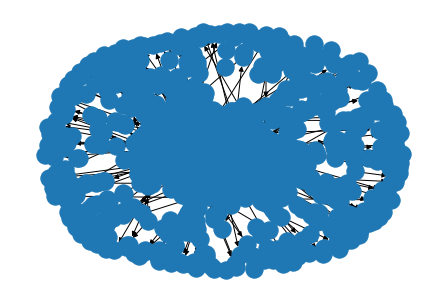

In [73]:
nx.draw(G)

In [74]:
df.to_csv("./datasets/graph_data.csv")